# Project: Investigate a Dataset [No-show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row to be investigated in this dataset to see the cause of not showing up. 


### Question(s) for Analysis
<ul>
<li> What factors are important to know to predict if a patient will show up for their scheduled appointment? </li>
<li> Can the duration between AppointmentDay and ScheduledDay affect the show up? </li>
</ul>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.00

Requirement already up-to-date: pandas==0.25.00 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> We start reading the dataset file and begin assessing and cleaning the data in order to be ready for analysis 

In [46]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Assessing

In [47]:
df.shape

(110527, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data

In [49]:
df = df.drop(df[df.duplicated()].index)
df.duplicated().sum()

0

Removing duplicates

In [50]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


These data require some sorting & cleaning

### Data Cleaning 

In [51]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

we remove spaces and make coulmns heads all lower case

In [52]:
df.rename({"no-show": "no_show"}, axis='columns', inplace =True)
df.rename({"hipertension": "hypertension"}, axis='columns', inplace =True)
df.rename({"handcap": "handicap"}, axis='columns', inplace =True)

we adjust the two columns names to unify columns names format and correcting spelling

In [53]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['month'] = df['appointmentday'].dt.month
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df["diff_between_days"]= (df['appointmentday'].dt.date - df['scheduledday'].dt.date).dt.days

we tend to convert AppointmentDay and ScheduledDay to datetime type to extract information regarding the months and the days of the appointment and the duration of days between AppointmentDay and ScheduledDay as [diff_between_days] 

In [54]:
df = df.drop(df[df.age < 1].index)
df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

As we see the minimum age up there is -1 which is impossible so we remove ages below 1 & we tend to drop these columns as they will not be in any mathematics opertion anymore 

In [55]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,month,diff_between_days
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,0


Here is our data ready for Exploratory Data Analysis

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factors are important to predict if a patient will show up?)

An overview of our data distributed using histograms

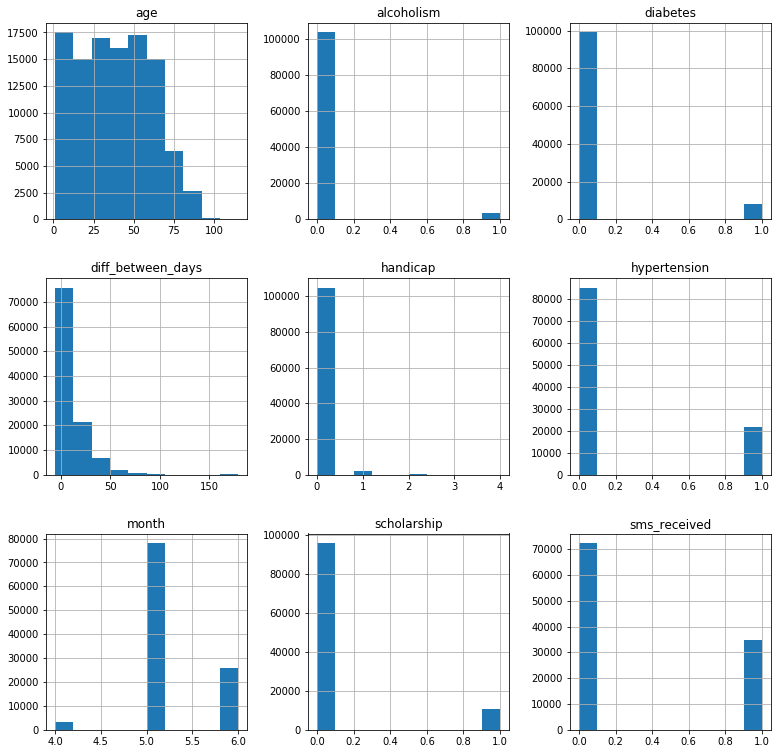

In [56]:
df.hist(figsize=(13,13));

<ul>
<li> Age is uniformly distributed till age of 60 after 60 it is right skwed </li>
<li> There is a few patients that have either alcoholism or diabetes so there is no relation between these two and show up </li>
<li> There is a few patients that are handicap there is no relation between this and show up </li>
<li> May is the most month with appointments </li>
<li> Sms_received has a high number of patients who received the sms so there is a relation we can build on here  </li>
</ul>

In [57]:
def plotting(column_name):
    attended = df.no_show == "No"
    not_attended = df.no_show == "Yes"
    df[column_name][attended].hist(alpha=0.5, bins=10, label='attended',figsize=(13,6))
    df[column_name][not_attended].hist(alpha=0.5, bins=10, label='not_attended',figsize=(13,6))
    plt.legend();
    plt.ylabel('No. of Patients')
    plt.xlabel(column_name + " Condition")
    plt.title('No. of patients relvant to '+ column_name)
    plt.xticks(rotation='vertical')

<li> we create a function for histogram plotting </li>

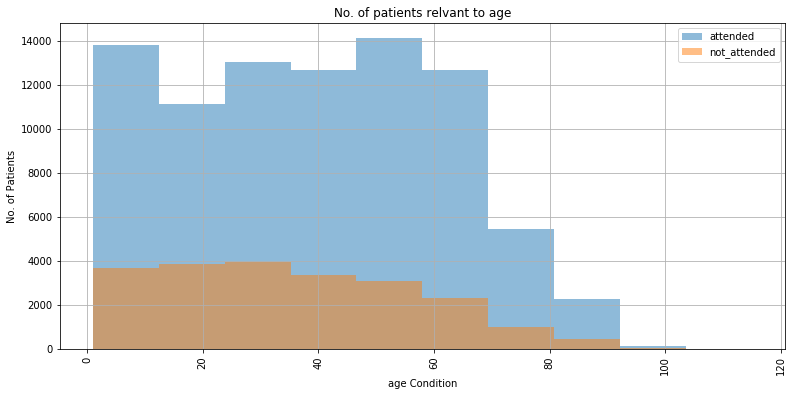

In [58]:
plotting("age")

<li> As we see there isn't a certain trend we can use to prdict the no show as the attendance is high at age from 1 to 10 then it becomes low then it become higher until the age of 70 there is a massive drop in attendance level as for age 70 to 115 the attendance level is still droping which mean there is a higher chance of patient not showing up if he is older than 70 </li>

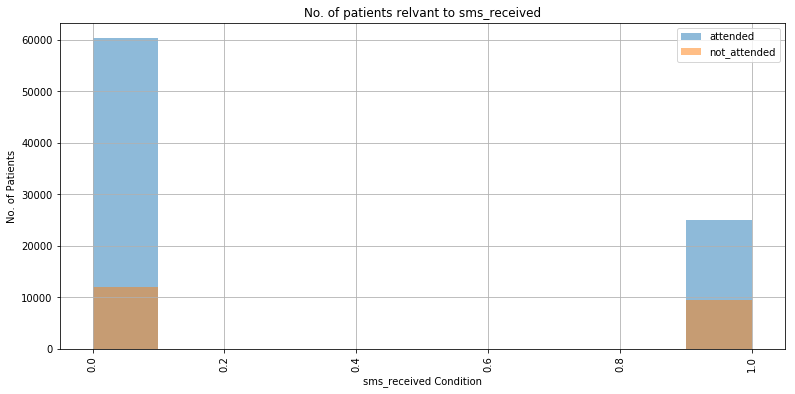

In [59]:
plotting("sms_received")

<li> As we see there is no relation here regarding no show condition but we notice that a high number of patients attended although they didn't receive a sms </li>

In [60]:
hypertensionshow =df.groupby(['no_show','hypertension'])['hypertension'].count()["No"]
hypertensionnotshow =df.groupby(['no_show','hypertension'])['hypertension'].count()["Yes"]

<li> we filter our data with the count of values to plot it in a bar graph</li>

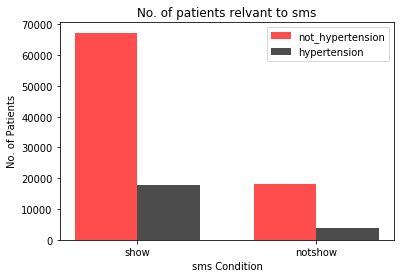

In [61]:
ind = np.arange(len(hypertensionshow))
width = 0.35    

red_bars = plt.bar(ind, hypertensionshow, width, color='r', alpha=.7, label='not_hypertension')
black_bars = plt.bar(ind + width, hypertensionnotshow, width, color='black', alpha=.7, label='hypertension')

plt.ylabel('No. of Patients')
plt.xlabel('sms Condition')
plt.title('No. of patients relvant to sms')
locations = ind + width / 2  
labels = ["show","notshow"]  
plt.xticks(locations, labels)
plt.legend()

<li> As we see there is no relation here regarding no show condition but we notice that a high number of patients attended although they didn't have hypertension </li>

### Research Question 2  (Can the duration between AppointmentDay and ScheduledDay affect the show up?)

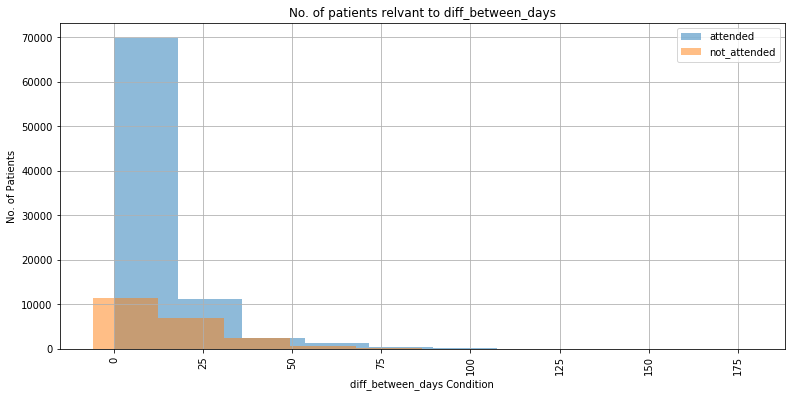

In [62]:
plotting("diff_between_days")

<li> As we see there is a massive drop in attendance level due to the duration between the day of scheduling the appointment and the appointment day as duration of days from 12 day up to more than 100 most of the patients doesn't show up ,aslo we notice that there is duration with negative sign </li>

In [63]:
df00 = df.loc[df.diff_between_days < 0]
df00

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,month,diff_between_days
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,5,-1
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,5,-1
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,5,-1
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,5,-6
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,5,-1


<li> As we see the data of duartion with negative sign we see that patients when scheduling there appointment they select a day before or more which cause the system to record them as they didn't show  </li>

<a id='conclusions'></a>
## Conclusions

<li> There is a higher chance of patient not showing up if he is older than 70 </li>
<li> There is no relation between no show condition and receiving a sms </li>
<li> There is no relation between no show condition and hypertension </li>
<li> There is a higher chance of patients not showing up if the duration between the day of scheduling the appointment and the appointment day more than 12 days</li>
<li> The system must not allow entry of old dates  </li>

<li>limitation: we didn't have data regarding the distance between patients and the hospitals to draw conclusion from it </li>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0